In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('savefig', transparent=True)

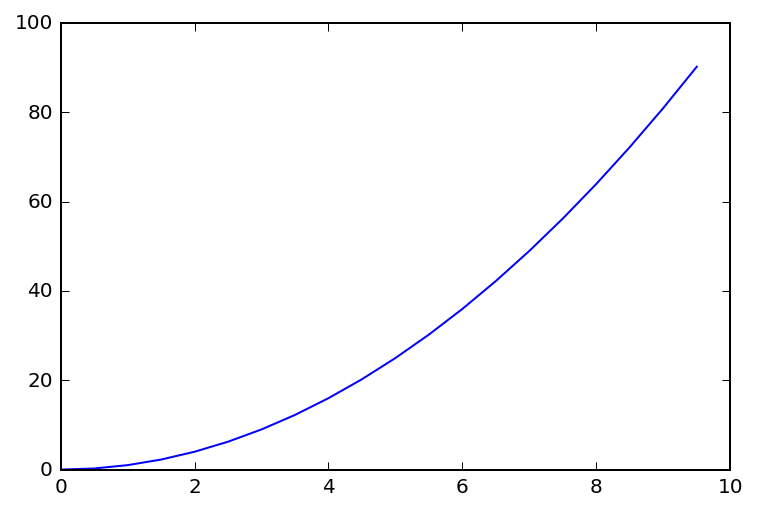

In [3]:
x = np.arange(0, 10, 0.5)
y = x**2

plt.plot(x,y)
plt.savefig('./basicplot.png')

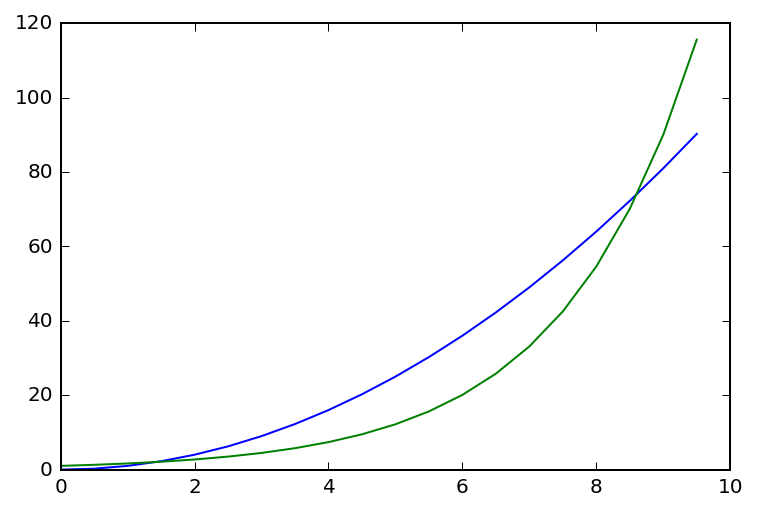

In [4]:
y2 = np.e**(x/2)

plt.plot(x,y)
plt.plot(x,y2)
plt.savefig('basicplot2.png')

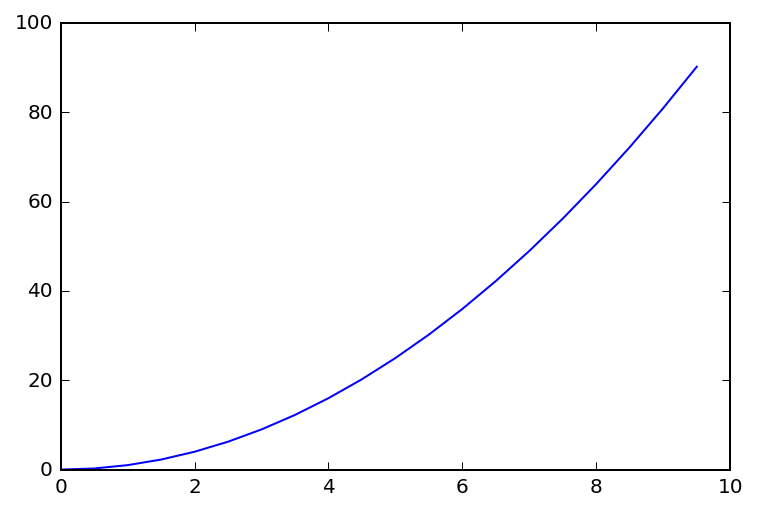

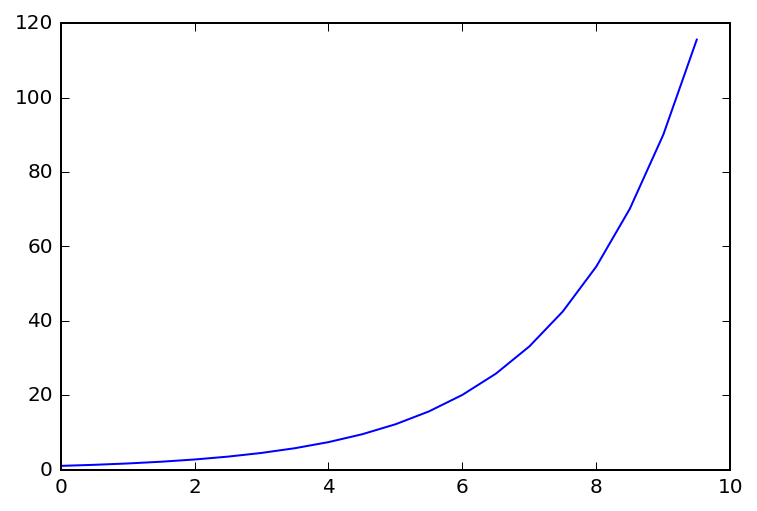

In [5]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.plot(x, y)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.plot(x, y2)
fig2.savefig('./basicplot3.png')

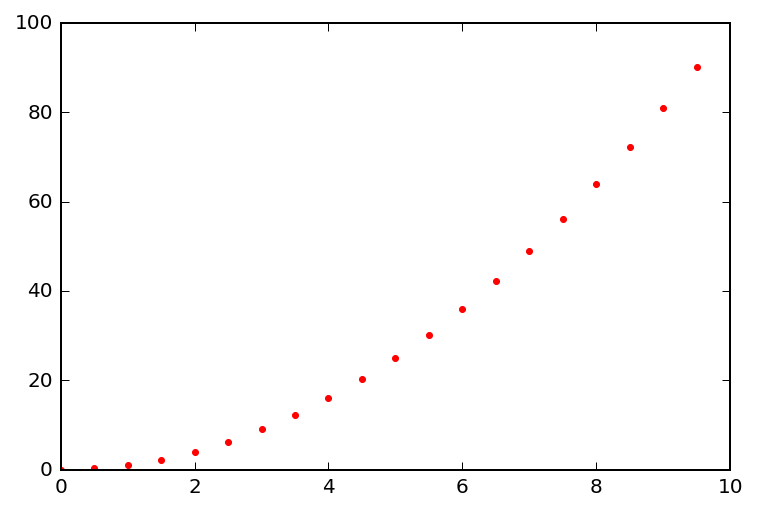

In [6]:
plt.plot(x, y, '.', color='r')
plt.savefig('markers.png')

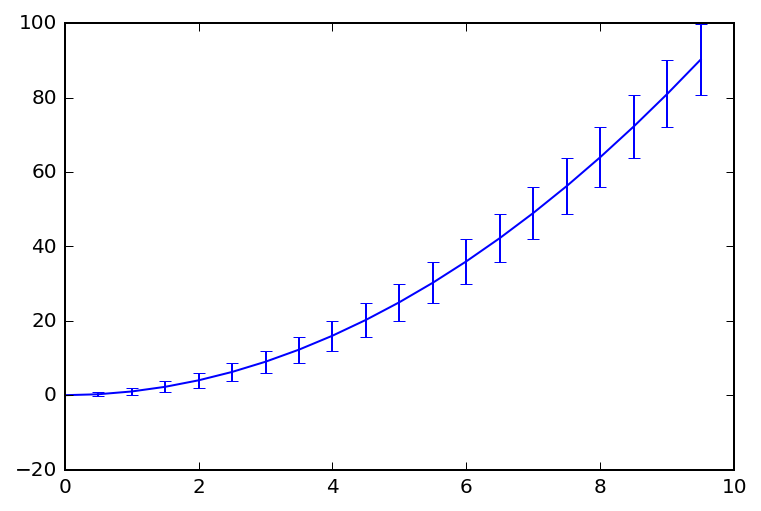

In [7]:
yerr = np.sqrt(y)
plt.errorbar(x, y, yerr)
plt.savefig('errorbar.png')

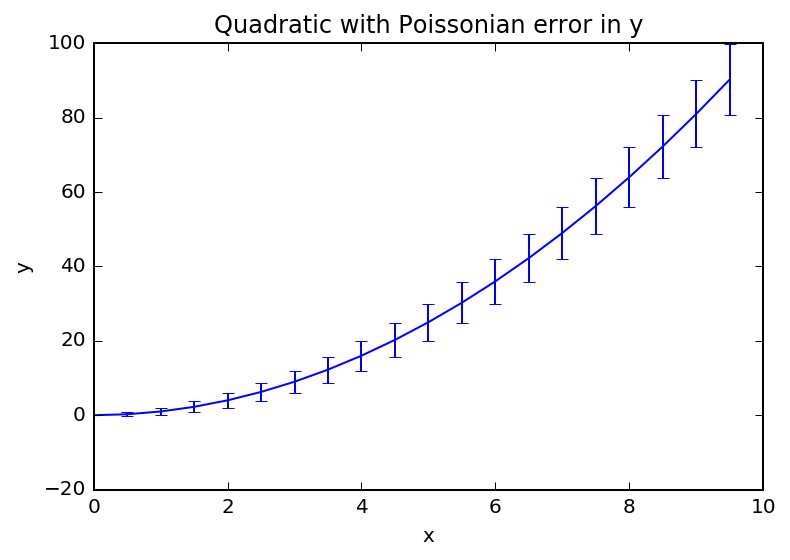

In [8]:
plt.errorbar(x, y, yerr)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic with Poissonian error in y')
plt.savefig('plot_labels.png')

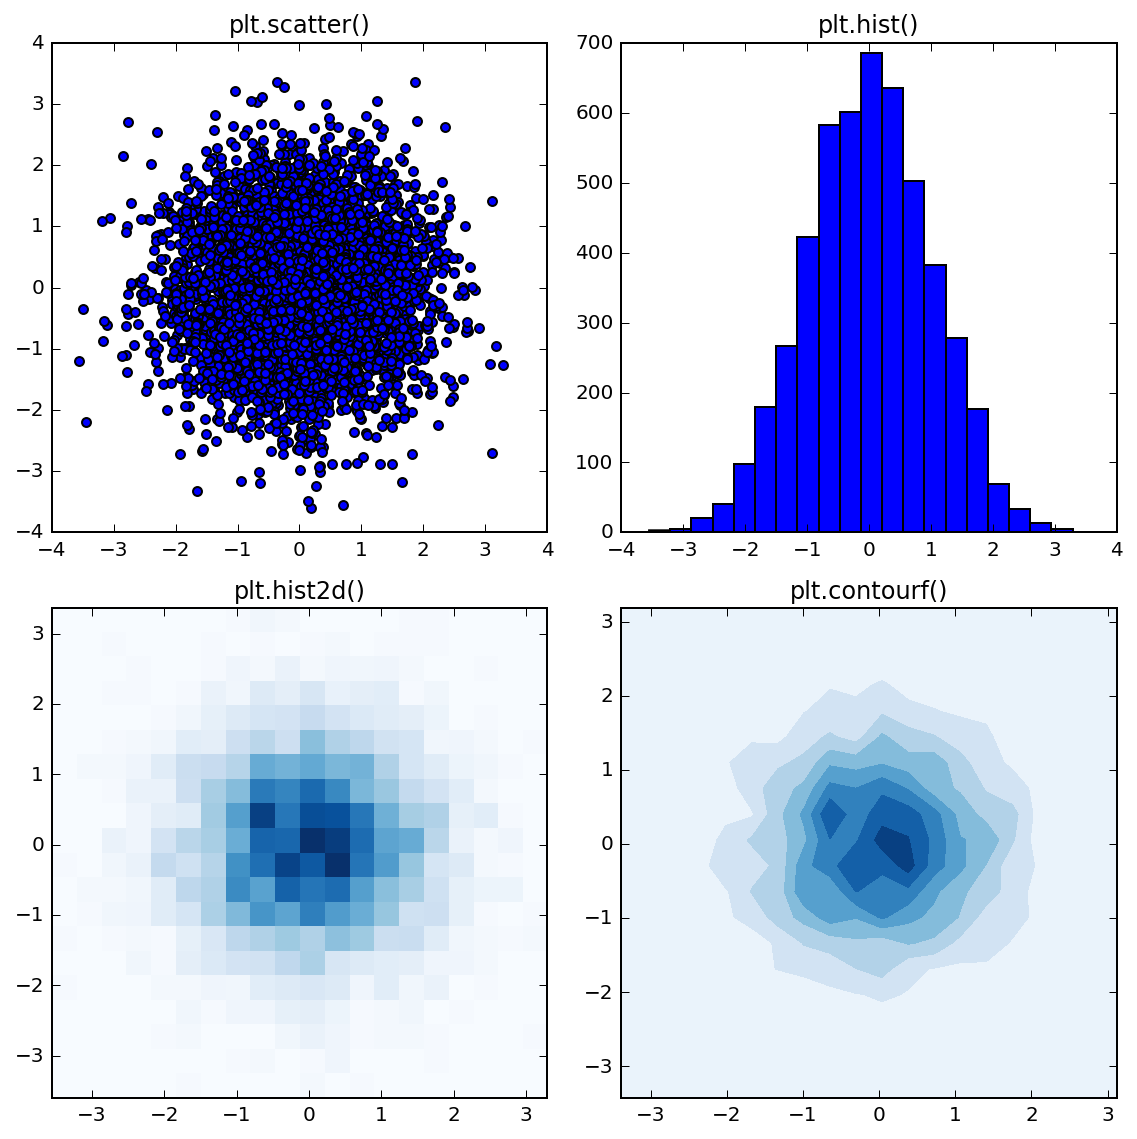

In [9]:
# make figure with two rows and two columns of subplots, specify size in inches
fig, [(ax0, ax1), (ax2, ax3)] = plt.subplots(2, 2, figsize=(8, 8))
data_x = np.random.randn(5000)
data_y = np.random.randn(5000)

ax0.scatter(data_x, data_y)
ax0.set_title('plt.scatter()')

# set number of bins for histograms
nbins = 20

# histogram of 1D dataset
ax1.hist(data_x, bins=nbins)
ax1.set_title('plt.hist()')

# histogram of 2D dataset
# we assign hist2d output to variables for use in the next plot
H, xedges, yedges, patches = ax2.hist2d(data_x, data_y, cmap='Blues', bins=(nbins, nbins))
ax2.set_title('plt.hist2d()')

x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1, nbins))
y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins, 1))
pdf = (H * (x_bin_sizes * y_bin_sizes))
X, Y = 0.5 * (xedges[1:] + xedges[:-1]), 0.5 * (yedges[1:] + yedges[:-1])
Z = pdf.T

# plot filled contour map
cs = ax3.contourf(X, Y, Z, origin="lower", cmap='Blues')
ax3.set_title('plt.contourf()')

# adjust plot spacing
fig.tight_layout()
fig.savefig('subplot_examples.png')

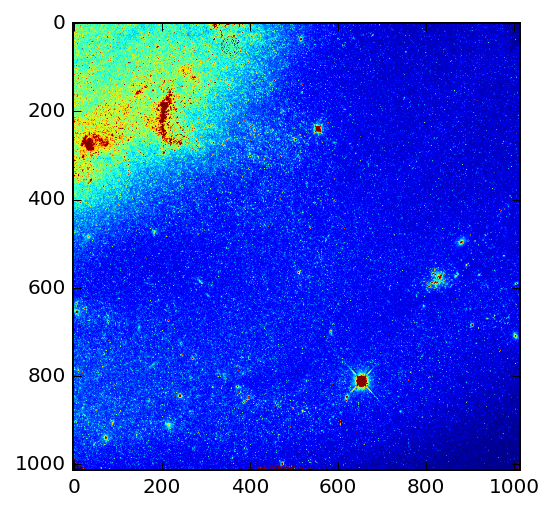

In [10]:
from astropy.io import fits

f = fits.open('/grp/hst/riab/training/python/ibsa01fpq_flt.fits')
data = f['sci'].data
f.close()

# display the data
# you may have to manually fiddle with vmin and vmax
plt.imshow(data, vmin=3, vmax=20)
plt.savefig('fits_image.png', origin='upper')

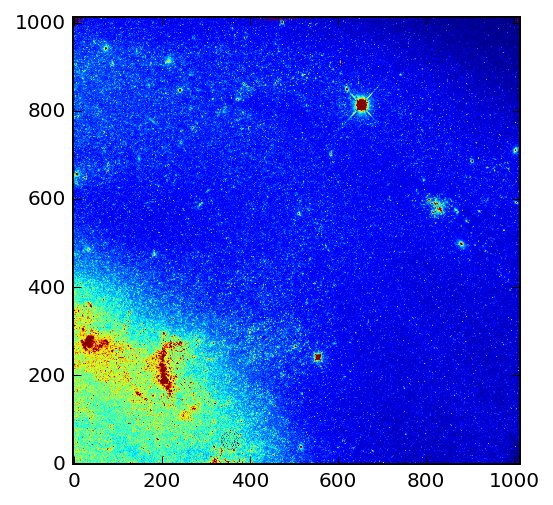

In [11]:
plt.imshow(data, vmin=3, vmax=20, origin='lower')
plt.savefig('fits_image_origin_lower.png')

In [12]:
rc('image', origin='lower')

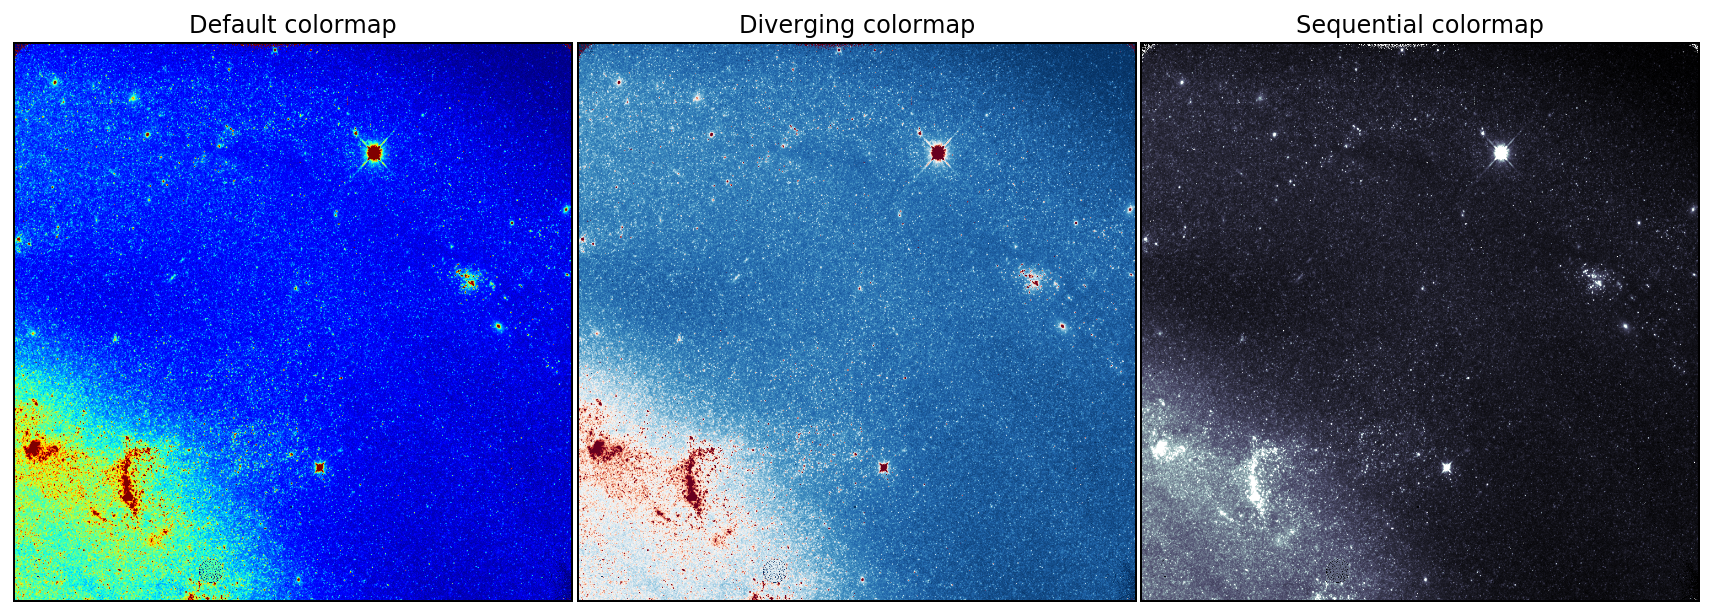

In [13]:
# set up figure; specify size in inches
fig = plt.figure(figsize=(12,5))

# add three subplots in a row
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# display the image in each subplot with different colormaps
ax1.imshow(data, vmin=3, vmax=20)
ax2.imshow(data, vmin=3, vmax=20, cmap='RdBu_r')
ax3.imshow(data, vmin=3, vmax=20, cmap='bone')
for ax in (ax1, ax2, ax3):
    ax.set_xticks([])
    ax.set_yticks([])

ax1.set_title('Default colormap')
ax2.set_title('Diverging colormap')
ax3.set_title('Sequential colormap')

fig.tight_layout()
fig.subplots_adjust(hspace=0.01, wspace=0.01)
fig.savefig('colormaps.png')